In [1]:
pip install Cmake


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
    import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [31]:
df = pd.read_csv("C:/Users/Quang Anh/Downloads/Crude-Oil.csv")

In [32]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,37.60,38.39,36.33,36.76,36.76,431985
1,2016-01-05,36.90,37.10,35.74,35.97,35.97,410131
2,2016-01-06,36.18,36.39,33.77,33.97,33.97,563811
3,2016-01-07,34.09,34.26,32.10,33.27,33.27,617409
4,2016-01-08,33.30,34.34,32.64,33.16,33.16,596496


In [33]:
#Select variable
dataset = df.loc[:, ['Date','Close']]
dataset.head(5)

,Date,Close
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [34]:
dataset.Date = pd.to_datetime(dataset.Date, format = "%Y-%m-%d")

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1749 non-null   datetime64[ns]
 1   Close   1749 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.5 KB


In [36]:
dataset = dataset.rename(columns = {'Close':'y'})
dataset = dataset.rename(columns = {'Date':'ds'})
dataset.head()

,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [71]:
train = dataset.iloc[:round(len(df) * 0.7)]
test = dataset.iloc[round(len(df) * 0.7):]

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dataset['ds'], dataset['y'], test_size=0.3)



In [47]:
mymodel = np.poly1d(np.polyfit(np.asarray(xtrain).astype(float), ytrain, 4))

myline = np.linspace(0, 6, 100)

r2 = r2_score(ytrain, mymodel(np.asarray(xtrain).astype(float)))

print(r2)

0.6524820361973449


In [48]:
xtrain1 = pd.DataFrame(xtrain)

In [49]:
ytrain1 = pd.DataFrame(ytrain)

In [50]:
training_set= pd.concat([xtrain1, ytrain1['y']], axis=1)
training_set

,ds,y
786,2019-02-21,56.96
1326,2021-04-13,63.15
1699,2022-10-02,83.63
1606,2022-05-19,113.23
897,2019-07-30,58.58
...,...,...
507,2018-01-10,63.57
1296,2021-03-02,59.75
788,2019-02-25,55.48
437,2017-09-28,51.67


In [51]:
len(training_set)

1224

In [52]:
xtest1 = pd.DataFrame(xtest)
ytest1 = pd.DataFrame(ytest)
test_set= pd.concat([xtest1, ytest1['y']], axis=1)
test_set


,ds,y
674,2018-09-09,67.54
641,2018-07-23,68.52
1622,2022-06-13,118.93
1108,2020-06-01,36.81
796,2019-03-07,56.66
...,...,...
494,2017-12-20,58.09
1285,2021-02-12,59.47
1338,2021-04-29,63.58
1219,2020-11-06,37.14


In [53]:
test_set

,ds,y
674,2018-09-09,67.54
641,2018-07-23,68.52
1622,2022-06-13,118.93
1108,2020-06-01,36.81
796,2019-03-07,56.66
...,...,...
494,2017-12-20,58.09
1285,2021-02-12,59.47
1338,2021-04-29,63.58
1219,2020-11-06,37.14


In [54]:
mymodel = np.poly1d(np.polyfit(np.asarray(xtrain).astype(float), ytrain, 4))

myline = np.linspace(0, 6, 100)

r2 = r2_score(ytest, mymodel(np.asarray(xtest).astype(float)))

print(r2)

0.6266785953780674


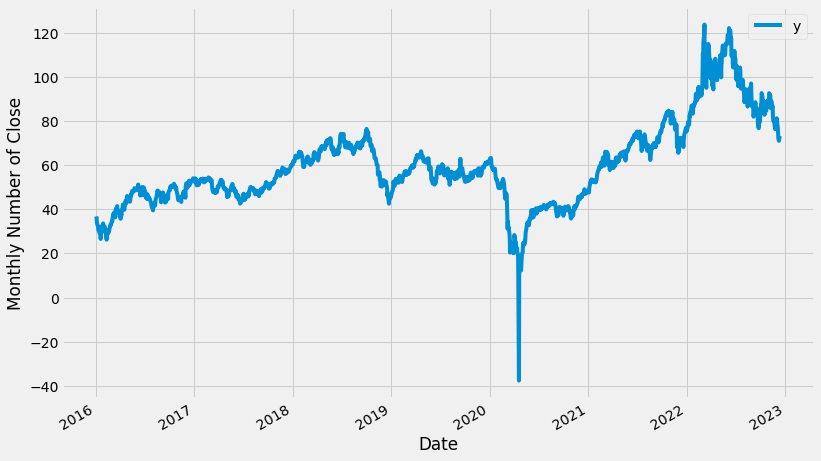

In [79]:
ax = dataset.set_index('ds').plot(figsize=(12, 8)) 
ax.set_ylabel('Monthly Number of Close') 
ax.set_xlabel('Date')  
plt.show(); 

In [56]:
my_model = Prophet(interval_width=0.95)

In [57]:
my_model.fit(train) 

16:58:57 - cmdstanpy - INFO - Chain [1] start processing
16:58:58 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future_dates = my_model.make_future_dataframe(periods=len(test), freq='D') 
future_dates.tail()

,ds
1744,2022-07-07
1745,2022-07-08
1746,2022-07-09
1747,2022-07-10
1748,2022-07-11


In [59]:
#merge regressors
future_dates = pd.concat([future_dates, dataset.iloc[:,1:]],
                   axis = 1)
future_dates.tail(5)

,ds,y
1744,2022-07-07,74.25
1745,2022-07-08,72.01
1746,2022-07-09,71.46
1747,2022-07-10,71.02
1748,2022-07-11,73.17


In [60]:
#forecast
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,33.065816,23.111419,42.588608,33.065816,33.065816,-0.057494,-0.057494,-0.057494,-0.310228,-0.310228,-0.310228,0.252734,0.252734,0.252734,0.0,0.0,0.0,33.008322
1,2016-01-05,33.135938,23.502310,43.334736,33.135938,33.135938,0.213710,0.213710,0.213710,-0.154986,-0.154986,-0.154986,0.368696,0.368696,0.368696,0.0,0.0,0.0,33.349648
2,2016-01-06,33.206060,23.096860,42.709447,33.206060,33.206060,0.185330,0.185330,0.185330,-0.300347,-0.300347,-0.300347,0.485677,0.485677,0.485677,0.0,0.0,0.0,33.391390
3,2016-01-07,33.276182,24.100063,42.916725,33.276182,33.276182,0.382082,0.382082,0.382082,-0.219870,-0.219870,-0.219870,0.601953,0.601953,0.601953,0.0,0.0,0.0,33.658264
4,2016-01-08,33.346303,23.779040,43.883004,33.346303,33.346303,0.753912,0.753912,0.753912,0.038216,0.038216,0.038216,0.715696,0.715696,0.715696,0.0,0.0,0.0,34.100215


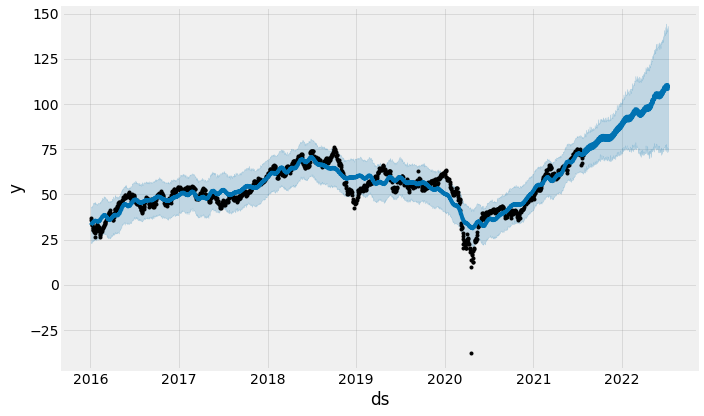

In [61]:
my_model.plot(forecast,uncertainty=True);

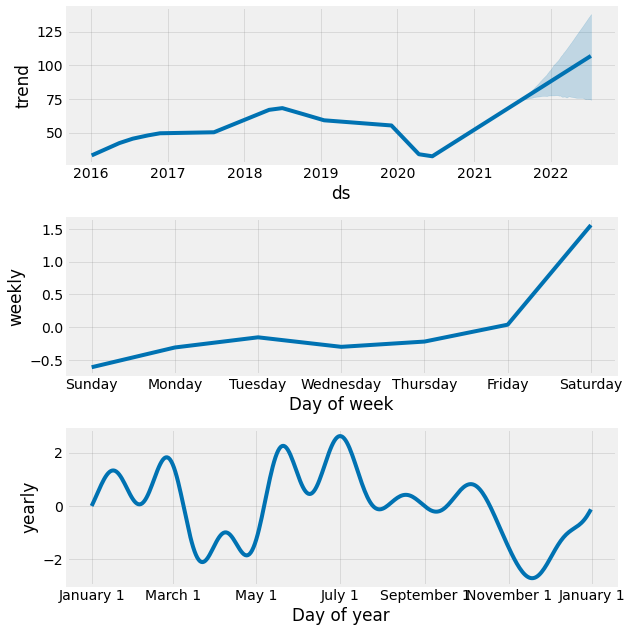

In [62]:
my_model.plot_components(forecast);

In [74]:
#predictions
predictions_prophet = forecast.yhat[-525:].rename("prophet")
predictions_prophet[:5]

1224    44.786407
1225    44.636078
1226    44.876152
1227    44.825462
1228    45.010564
Name: prophet, dtype: float64

In [75]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test['y'], predictions_prophet),0))
print(round(np.sqrt(mean_squared_error(test['y'], predictions_prophet)), 0))

8.0
12.0


In [76]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [77]:
mape(test['y'],predictions_prophet)

0.09584365938301716

In [104]:
#CV
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='540 days', period='1 days', horizon = '30 days')


  0%|          | 0/1461 [00:00<?, ?it/s]

17:50:27 - cmdstanpy - INFO - Chain [1] start processing
17:50:27 - cmdstanpy - INFO - Chain [1] done processing
17:50:27 - cmdstanpy - INFO - Chain [1] start processing
17:50:28 - cmdstanpy - INFO - Chain [1] done processing
17:50:28 - cmdstanpy - INFO - Chain [1] start processing
17:50:28 - cmdstanpy - INFO - Chain [1] done processing
17:50:29 - cmdstanpy - INFO - Chain [1] start processing
17:50:29 - cmdstanpy - INFO - Chain [1] done processing
17:50:29 - cmdstanpy - INFO - Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
17:50:31 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
17:50:31 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
17:50:32 - cmdstanpy - INFO - Chain [1] start processing
17:50:32 - cmdstanpy - INFO - Chain [1]

17:51:04 - cmdstanpy - INFO - Chain [1] start processing
17:51:04 - cmdstanpy - INFO - Chain [1] done processing
17:51:04 - cmdstanpy - INFO - Chain [1] start processing
17:51:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:51:05 - cmdstanpy - INFO - Chain [1] start processing
17:51:05 - cmdstanpy - INFO - Chain [1] done processing
17:51:05 - cmdstanpy - INFO - Chain [1] start processing
17:51:05 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:51:06 - cmdstanpy - INFO - Chain [1] start processing
17:51:06 - cmdstanpy - INFO - Chain [1] done processing
17:51:06 - cmdstanpy - INFO - Chain [1] start processing
17:51:06 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:51:07 -

17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:33 - cmdstanpy - INFO - Chain [1] done processing
17:51:34 - cmdstanpy - INFO - Chain [1] start processing
17:51:34 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:51:35 - cmdstanpy - INFO - Chain [1] start processing
17:51:35 - cmdstanpy - INFO - Chain [1] done processing
17:51:35 - cmdstanpy - INFO - Chain [1] start processing
17:51:35 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:51:36 - cmdstanpy - INFO - Chain [1] start processing
17:51:36 - cmdstanpy - INFO - Chain [1] done processing
17:51:36 - cmdstanpy - INFO - Chain [1] start processing
17:51:36 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:51:37 -

17:52:03 - cmdstanpy - INFO - Chain [1] start processing
17:52:04 - cmdstanpy - INFO - Chain [1] done processing
17:52:04 - cmdstanpy - INFO - Chain [1] start processing
17:52:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:52:05 - cmdstanpy - INFO - Chain [1] start processing
17:52:05 - cmdstanpy - INFO - Chain [1] done processing
17:52:05 - cmdstanpy - INFO - Chain [1] start processing
17:52:05 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:52:06 - cmdstanpy - INFO - Chain [1] start processing
17:52:06 - cmdstanpy - INFO - Chain [1] done processing
17:52:06 - cmdstanpy - INFO - Chain [1] start processing
17:52:07 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:52:07 -

17:52:34 - cmdstanpy - INFO - Chain [1] start processing
17:52:34 - cmdstanpy - INFO - Chain [1] done processing
17:52:34 - cmdstanpy - INFO - Chain [1] start processing
17:52:34 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:52:35 - cmdstanpy - INFO - Chain [1] start processing
17:52:35 - cmdstanpy - INFO - Chain [1] done processing
17:52:36 - cmdstanpy - INFO - Chain [1] start processing
17:52:36 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:52:36 - cmdstanpy - INFO - Chain [1] start processing
17:52:36 - cmdstanpy - INFO - Chain [1] done processing
17:52:37 - cmdstanpy - INFO - Chain [1] start processing
17:52:37 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:52:38 -

17:53:04 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:53:05 - cmdstanpy - INFO - Chain [1] start processing
17:53:05 - cmdstanpy - INFO - Chain [1] done processing
17:53:05 - cmdstanpy - INFO - Chain [1] start processing
17:53:05 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:53:06 - cmdstanpy - INFO - Chain [1] start processing
17:53:06 - cmdstanpy - INFO - Chain [1] done processing
17:53:06 - cmdstanpy - INFO - Chain [1] start processing
17:53:07 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:53:07 - cmdstanpy - INFO - Chain [1] start processing
17:53:07 - cmdstanpy - INFO - Chain [1] done processing
17:53:08 - cmdstanpy - INFO - Chain [1] start processing
17:53:08 -

17:53:35 - cmdstanpy - INFO - Chain [1] start processing
17:53:35 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:53:36 - cmdstanpy - INFO - Chain [1] start processing
17:53:36 - cmdstanpy - INFO - Chain [1] done processing
17:53:36 - cmdstanpy - INFO - Chain [1] start processing
17:53:36 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:53:37 - cmdstanpy - INFO - Chain [1] start processing
17:53:37 - cmdstanpy - INFO - Chain [1] done processing
17:53:38 - cmdstanpy - INFO - Chain [1] start processing
17:53:38 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
17:53:38 - cmdstanpy - INFO - Chain [1] start processing
17:53:38 - cmdstanpy - INFO - Chain [1] done processing
17:53:39 -

17:54:07 - cmdstanpy - INFO - Chain [1] done processing
17:54:08 - cmdstanpy - INFO - Chain [1] start processing
17:54:08 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:54:08 - cmdstanpy - INFO - Chain [1] start processing
17:54:09 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:54:09 - cmdstanpy - INFO - Chain [1] start processing
17:54:09 - cmdstanpy - INFO - Chain [1] done processing
17:54:10 - cmdstanpy - INFO - Chain [1] start processing
17:54:10 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:54:10 - cmdstanpy - INFO - Chain [1] start processing
17:54:11 - cmdstanpy - INFO - Chain [1] done processing
17:54:11 - cmdstanpy - INFO - Chain [1] start processing
17:54:11 -

17:54:40 - cmdstanpy - INFO - Chain [1] start processing
17:54:40 - cmdstanpy - INFO - Chain [1] done processing
17:54:41 - cmdstanpy - INFO - Chain [1] start processing
17:54:41 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
17:54:42 - cmdstanpy - INFO - Chain [1] start processing
17:54:42 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
17:54:42 - cmdstanpy - INFO - Chain [1] start processing
17:54:42 - cmdstanpy - INFO - Chain [1] done processing
17:54:43 - cmdstanpy - INFO - Chain [1] start processing
17:54:43 - cmdstanpy - INFO - Chain [1] done processing
17:54:44 - cmdstanpy - INFO - Chain [1] start processing
17:54:44 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
17:54:44 -

17:55:14 - cmdstanpy - INFO - Chain [1] start processing
17:55:15 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:55:15 - cmdstanpy - INFO - Chain [1] start processing
17:55:15 - cmdstanpy - INFO - Chain [1] done processing
17:55:16 - cmdstanpy - INFO - Chain [1] start processing
17:55:16 - cmdstanpy - INFO - Chain [1] done processing
17:55:17 - cmdstanpy - INFO - Chain [1] start processing
17:55:17 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:55:17 - cmdstanpy - INFO - Chain [1] start processing
17:55:17 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:55:18 - cmdstanpy - INFO - Chain [1] start processing
17:55:18 - cmdstanpy - INFO - Chain [1] done processing
17:55:19 -

17:55:51 - cmdstanpy - INFO - Chain [1] start processing
17:55:51 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:55:52 - cmdstanpy - INFO - Chain [1] start processing
17:55:52 - cmdstanpy - INFO - Chain [1] done processing
17:55:52 - cmdstanpy - INFO - Chain [1] start processing
17:55:53 - cmdstanpy - INFO - Chain [1] done processing
17:55:53 - cmdstanpy - INFO - Chain [1] start processing
17:55:53 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:55:54 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
17:55:54 - cmdstanpy - INFO - Chain [1] start processing
17:55:55 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:55:55 -

17:56:28 - cmdstanpy - INFO - Chain [1] start processing
17:56:28 - cmdstanpy - INFO - Chain [1] done processing
17:56:29 - cmdstanpy - INFO - Chain [1] start processing
17:56:29 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:56:30 - cmdstanpy - INFO - Chain [1] start processing
17:56:30 - cmdstanpy - INFO - Chain [1] done processing
17:56:31 - cmdstanpy - INFO - Chain [1] start processing
17:56:31 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:56:31 - cmdstanpy - INFO - Chain [1] start processing
17:56:32 - cmdstanpy - INFO - Chain [1] done processing
17:56:32 - cmdstanpy - INFO - Chain [1] start processing
17:56:32 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:56:33 -

17:57:07 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:57:07 - cmdstanpy - INFO - Chain [1] start processing
17:57:07 - cmdstanpy - INFO - Chain [1] done processing
17:57:08 - cmdstanpy - INFO - Chain [1] start processing
17:57:08 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:57:09 - cmdstanpy - INFO - Chain [1] start processing
17:57:09 - cmdstanpy - INFO - Chain [1] done processing
17:57:09 - cmdstanpy - INFO - Chain [1] start processing
17:57:09 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:57:10 - cmdstanpy - INFO - Chain [1] start processing
17:57:10 - cmdstanpy - INFO - Chain [1] done processing
17:57:11 - cmdstanpy - INFO - Chain [1] start processing
17:57:11 -

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:57:43 - cmdstanpy - INFO - Chain [1] start processing
17:57:44 - cmdstanpy - INFO - Chain [1] done processing
17:57:44 - cmdstanpy - INFO - Chain [1] start processing
17:57:44 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:57:45 - cmdstanpy - INFO - Chain [1] start processing
17:57:45 - cmdstanpy - INFO - Chain [1] done processing
17:57:46 - cmdstanpy - INFO - Chain [1] start processing
17:57:46 - cmdstanpy - INFO - Chain [1] done processing
17:57:46 - cmdstanpy - INFO - Chain [1] start processing
17:57:47 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:57:47 - cmdstanpy - INFO - Chain [1] start processing
17:57:47 - cmdstanpy - INFO - Chain [1] done processing
17:57:48 -

17:58:19 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:58:19 - cmdstanpy - INFO - Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing
17:58:20 - cmdstanpy - INFO - Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:58:21 - cmdstanpy - INFO - Chain [1] start processing
17:58:21 - cmdstanpy - INFO - Chain [1] done processing
17:58:22 - cmdstanpy - INFO - Chain [1] start processing
17:58:22 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:58:22 - cmdstanpy - INFO - Chain [1] start processing
17:58:23 - cmdstanpy - INFO - Chain [1] done processing
17:58:23 - cmdstanpy - INFO - Chain [1] start processing
17:58:23 -

17:58:56 - cmdstanpy - INFO - Chain [1] start processing
17:58:56 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:58:57 - cmdstanpy - INFO - Chain [1] start processing
17:58:57 - cmdstanpy - INFO - Chain [1] done processing
17:58:58 - cmdstanpy - INFO - Chain [1] start processing
17:58:58 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:58:58 - cmdstanpy - INFO - Chain [1] start processing
17:58:59 - cmdstanpy - INFO - Chain [1] done processing
17:58:59 - cmdstanpy - INFO - Chain [1] start processing
17:58:59 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
17:59:00 - cmdstanpy - INFO - Chain [1] start processing
17:59:00 - cmdstanpy - INFO - Chain [1] done processing
17:59:01 -

17:59:47 - cmdstanpy - INFO - Chain [1] start processing
17:59:47 - cmdstanpy - INFO - Chain [1] done processing
17:59:47 - cmdstanpy - INFO - Chain [1] start processing
17:59:48 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
17:59:48 - cmdstanpy - INFO - Chain [1] start processing
17:59:49 - cmdstanpy - INFO - Chain [1] done processing
17:59:49 - cmdstanpy - INFO - Chain [1] start processing
17:59:49 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
17:59:50 - cmdstanpy - INFO - Chain [1] start processing
17:59:50 - cmdstanpy - INFO - Chain [1] done processing
17:59:51 - cmdstanpy - INFO - Chain [1] start processing
17:59:51 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
17:59:52 -

18:00:29 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:00:29 - cmdstanpy - INFO - Chain [1] start processing
18:00:30 - cmdstanpy - INFO - Chain [1] done processing
18:00:30 - cmdstanpy - INFO - Chain [1] start processing
18:00:30 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:00:31 - cmdstanpy - INFO - Chain [1] start processing
18:00:31 - cmdstanpy - INFO - Chain [1] done processing
18:00:32 - cmdstanpy - INFO - Chain [1] start processing
18:00:32 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
18:00:33 - cmdstanpy - INFO - Chain [1] start processing
18:00:33 - cmdstanpy - INFO - Chain [1] done processing
18:00:34 - cmdstanpy - INFO - Chain [1] start processing
18:00:34 -

18:01:10 - cmdstanpy - INFO - Chain [1] start processing
18:01:11 - cmdstanpy - INFO - Chain [1] done processing
18:01:11 - cmdstanpy - INFO - Chain [1] start processing
18:01:12 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:01:12 - cmdstanpy - INFO - Chain [1] start processing
18:01:13 - cmdstanpy - INFO - Chain [1] done processing
18:01:13 - cmdstanpy - INFO - Chain [1] start processing
18:01:13 - cmdstanpy - INFO - Chain [1] done processing
18:01:14 - cmdstanpy - INFO - Chain [1] start processing
18:01:14 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:01:15 - cmdstanpy - INFO - Chain [1] start processing
18:01:15 - cmdstanpy - INFO - Chain [1] done processing
18:01:16 - cmdstanpy - INFO - Chain [1] start processing
18:01:16 - cmdstanpy - INFO - Chain [1] done processing
d

18:01:56 - cmdstanpy - INFO - Chain [1] done processing
18:01:56 - cmdstanpy - INFO - Chain [1] start processing
18:01:57 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:01:57 - cmdstanpy - INFO - Chain [1] start processing
18:01:58 - cmdstanpy - INFO - Chain [1] done processing
18:01:58 - cmdstanpy - INFO - Chain [1] start processing
18:01:59 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:01:59 - cmdstanpy - INFO - Chain [1] start processing
18:01:59 - cmdstanpy - INFO - Chain [1] done processing
18:02:00 - cmdstanpy - INFO - Chain [1] start processing
18:02:00 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:02:01 - cmdstanpy - INFO - Chain [1] start processing
18:02:01 -

18:02:41 - cmdstanpy - INFO - Chain [1] start processing
18:02:41 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:02:42 - cmdstanpy - INFO - Chain [1] start processing
18:02:42 - cmdstanpy - INFO - Chain [1] done processing
18:02:43 - cmdstanpy - INFO - Chain [1] start processing
18:02:43 - cmdstanpy - INFO - Chain [1] done processing
18:02:43 - cmdstanpy - INFO - Chain [1] start processing
18:02:44 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:02:44 - cmdstanpy - INFO - Chain [1] start processing
18:02:45 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:02:45 - cmdstanpy - INFO - Chain [1] start processing
18:02:46 - cmdstanpy - INFO - Chain [1] done processing
18:02:46 -

18:03:22 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:03:22 - cmdstanpy - INFO - Chain [1] start processing
18:03:23 - cmdstanpy - INFO - Chain [1] done processing
18:03:23 - cmdstanpy - INFO - Chain [1] start processing
18:03:23 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:03:24 - cmdstanpy - INFO - Chain [1] start processing
18:03:24 - cmdstanpy - INFO - Chain [1] done processing
18:03:25 - cmdstanpy - INFO - Chain [1] start processing
18:03:25 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:03:26 - cmdstanpy - INFO - Chain [1] start processing
18:03:26 - cmdstanpy - INFO - Chain [1] done processing
18:03:26 - cmdstanpy - INFO - Chain [1] start processing
18:03:27 -

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
18:04:01 - cmdstanpy - INFO - Chain [1] start processing
18:04:01 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
18:04:01 - cmdstanpy - INFO - Chain [1] start processing
18:04:02 - cmdstanpy - INFO - Chain [1] done processing
18:04:02 - cmdstanpy - INFO - Chain [1] start processing
18:04:02 - cmdstanpy - INFO - Chain [1] done processing
18:04:03 - cmdstanpy - INFO - Chain [1] start processing
18:04:03 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
18:04:04 - cmdstanpy - INFO - Chain [1] start processing
18:04:04 - cmdstanpy - INFO - Chain [1] done processing
18:04:04 - cmdstanpy - INFO - Chain [1] start processing
18:04:04 - cmdstanpy - INFO - Chain [1] done processing
distribute

18:04:38 - cmdstanpy - INFO - Chain [1] done processing
18:04:38 - cmdstanpy - INFO - Chain [1] start processing
18:04:38 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:04:39 - cmdstanpy - INFO - Chain [1] start processing
18:04:39 - cmdstanpy - INFO - Chain [1] done processing
18:04:40 - cmdstanpy - INFO - Chain [1] start processing
18:04:40 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:04:41 - cmdstanpy - INFO - Chain [1] start processing
18:04:41 - cmdstanpy - INFO - Chain [1] done processing
18:04:41 - cmdstanpy - INFO - Chain [1] start processing
18:04:41 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:04:42 - cmdstanpy - INFO - Chain [1] start processing
18:04:42 -

18:05:17 - cmdstanpy - INFO - Chain [1] start processing
18:05:17 - cmdstanpy - INFO - Chain [1] done processing
18:05:17 - cmdstanpy - INFO - Chain [1] start processing
18:05:18 - cmdstanpy - INFO - Chain [1] done processing
18:05:18 - cmdstanpy - INFO - Chain [1] start processing
18:05:18 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:05:19 - cmdstanpy - INFO - Chain [1] start processing
18:05:19 - cmdstanpy - INFO - Chain [1] done processing
18:05:20 - cmdstanpy - INFO - Chain [1] start processing
18:05:20 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:05:20 - cmdstanpy - INFO - Chain [1] start processing
18:05:21 - cmdstanpy - INFO - Chain [1] done processing
18:05:21 - cmdstanpy - INFO - Chain [1] start processing
18:05:21 - cmdstanpy - INFO - Chain [1] done processing
d

18:05:55 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:05:55 - cmdstanpy - INFO - Chain [1] start processing
18:05:55 - cmdstanpy - INFO - Chain [1] done processing
18:05:56 - cmdstanpy - INFO - Chain [1] start processing
18:05:56 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:05:57 - cmdstanpy - INFO - Chain [1] start processing
18:05:57 - cmdstanpy - INFO - Chain [1] done processing
18:05:57 - cmdstanpy - INFO - Chain [1] start processing
18:05:58 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:05:58 - cmdstanpy - INFO - Chain [1] start processing
18:05:58 - cmdstanpy - INFO - Chain [1] done processing
18:05:59 - cmdstanpy - INFO - Chain [1] start processing
18:05:59 -

18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
d

18:07:15 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:07:20 - cmdstanpy - INFO - Chain [1] start processing
18:07:20 -

18:08:02 - cmdstanpy - INFO - Chain [1] start processing
18:08:02 - cmdstanpy - INFO - Chain [1] done processing
18:08:03 - cmdstanpy - INFO - Chain [1] start processing
18:08:03 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:08:04 - cmdstanpy - INFO - Chain [1] start processing
18:08:04 - cmdstanpy - INFO - Chain [1] done processing
18:08:05 - cmdstanpy - INFO - Chain [1] start processing
18:08:05 - cmdstanpy - INFO - Chain [1] done processing
18:08:05 - cmdstanpy - INFO - Chain [1] start processing
18:08:06 - cmdstanpy - INFO - Chain [1] done processing
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
18:08:06 - cmdstanpy - INFO - Chain [1] start processing
18:08:07 - cmdstanpy - INFO - Chain [1] done processing
18:08:07 - cmdstanpy - INFO - Chain [1] start processing
18:08:07 - cmdstanpy - INFO - Chain [1] done processing
d

In [105]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-28,42.061556,39.278799,45.207517,44.93,2017-06-27
1,2017-06-29,41.796714,38.928349,44.755000,46.04,2017-06-27
2,2017-07-03,40.786977,38.084064,43.867053,47.07,2017-06-27
3,2017-07-04,40.374227,37.205875,43.320917,45.13,2017-06-27
4,2017-07-05,39.986514,36.922272,42.905526,45.52,2017-06-27


In [106]:
dataset.head()

,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [107]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,79.002207,8.888319,6.287066,0.151446,0.072526,0.139570,0.680026
1,5 days,82.233500,9.068269,6.441315,0.154872,0.076034,0.142743,0.667983
2,6 days,85.598180,9.251928,6.594841,0.158269,0.078562,0.145890,0.656284
3,7 days,89.492852,9.460066,6.761505,0.162061,0.079970,0.149303,0.642391
4,8 days,94.432288,9.717628,6.971491,0.166924,0.082940,0.153624,0.623621


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
C:\Users\Quang Anh\anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Quang Anh\anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


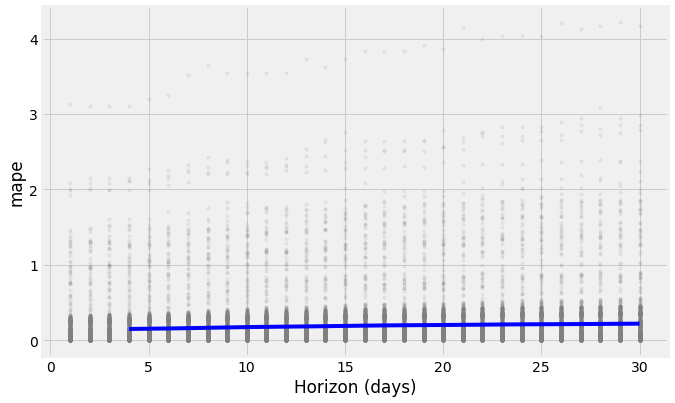

In [108]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [109]:
from dask.distributed import Client



client = Client()  # connect to the cluster

df_cv = cross_validation(my_model, initial='360 days', period='1 days', horizon='30 days',

                         parallel="processes")

C:\Users\Quang Anh\anaconda3\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64452 instead
  warnings.warn(
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


In [85]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': np.arange(5,10,5)
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(dataset)  # Fit model with given params
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

17:37:38 - cmdstanpy - INFO - Chain [1] start processing
17:37:38 - cmdstanpy - INFO - Chain [1] done processing
17:37:39 - cmdstanpy - INFO - Chain [1] start processing
17:37:39 - cmdstanpy - INFO - Chain [1] done processing
17:37:39 - cmdstanpy - INFO - Chain [1] start processing
17:37:39 - cmdstanpy - INFO - Chain [1] done processing
17:37:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:40 - cmdstanpy - INFO - Chain [1] done processing
17:37:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:40 - cmdstanpy - INFO - Chain [1] done processing
17:37:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:41 - cmdstanpy - INFO - Chain [1] done processing
17:37:41 - cmdstanpy - INFO - Chain [1] start processing
17:37:41 - cmdstanpy - INFO - Chain [1] done processing
17:37:42 - cmdstanpy - INFO - Chain [1] start processing
17:37:42 - cmdstanpy - INFO - Chain [1] done processing
17:37:42 - cmdstanpy - INFO - Chain [1] start processing
17:37:43 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                     5   
1                     0.001                     0.10                     5   
2                     0.001                     1.00                     5   
3                     0.001                    10.00                     5   
4                     0.010                     0.01                     5   
5                     0.010                     0.10                     5   
6                     0.010                     1.00                     5   
7                     0.010                    10.00                     5   
8                     0.100                     0.01                     5   
9                     0.100                     0.10                     5   
10                    0.100                     1.00                     5   
11                    0.100                    10.00            

In [110]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 5}


In [111]:
#build model
model = Prophet(growth = "linear",
          yearly_seasonality = True,
          weekly_seasonality = True,
          daily_seasonality = False,
          seasonality_mode = "multiplicative",
          seasonality_prior_scale = best_params['seasonality_prior_scale'],
          holidays_prior_scale = best_params['holidays_prior_scale'],
          changepoint_prior_scale = best_params['changepoint_prior_scale'])
model.fit(train)

18:16:24 - cmdstanpy - INFO - Chain [1] start processing
18:16:24 - cmdstanpy - INFO - Chain [1] done processing


In [113]:
future_dates


,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1919,2022-12-29,NaN
1920,2022-12-30,NaN
1921,2022-12-31,NaN
1922,2023-01-01,NaN


In [122]:
#Create Future Dataframe
future_dates = my_model.make_future_dataframe(periods=350, freq='D')
future_dates = pd.concat([future_dates, dataset.iloc[:,1:]],
                   axis = 1)
future_dates.tail(1)


,ds,y
1748,2022-07-11,73.17


In [123]:
#forecast
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,33.065816,23.173252,43.129804,33.065816,33.065816,-0.057494,-0.057494,-0.057494,-0.310228,-0.310228,-0.310228,0.252734,0.252734,0.252734,0.0,0.0,0.0,33.008322
1,2016-01-05,33.135938,23.620388,43.537354,33.135938,33.135938,0.213710,0.213710,0.213710,-0.154986,-0.154986,-0.154986,0.368696,0.368696,0.368696,0.0,0.0,0.0,33.349648
2,2016-01-06,33.206060,24.036588,42.732991,33.206060,33.206060,0.185330,0.185330,0.185330,-0.300347,-0.300347,-0.300347,0.485677,0.485677,0.485677,0.0,0.0,0.0,33.391390
3,2016-01-07,33.276182,23.765932,43.786450,33.276182,33.276182,0.382082,0.382082,0.382082,-0.219870,-0.219870,-0.219870,0.601953,0.601953,0.601953,0.0,0.0,0.0,33.658264
4,2016-01-08,33.346303,23.684915,44.211947,33.346303,33.346303,0.753912,0.753912,0.753912,0.038216,0.038216,0.038216,0.715696,0.715696,0.715696,0.0,0.0,0.0,34.100215


In [126]:
#extract predictions
predictions_prophet_tuned = forecast.yhat[:len(test)].rename("prophet_tuned")
predictions_prophet_tuned.index = test["ds"]
predictions_prophet_tuned.head()

ds
2020-11-13    33.008322
2020-11-16    33.349648
2020-11-17    33.391390
2020-11-18    33.658264
2020-11-19    34.100215
Name: prophet_tuned, dtype: float64

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
